# Parcial Practico

<h2>Juan Pablo Abril Serna</h2>

<h3>Primer parcial practico con la base de datos Ventas.xlsx</h3>

Se encuentra información de clientes  y ventas de una compañía de artículos de oficina y hogar, que cuenta con varios fabricantes y marcas  en las diferentes áreas metropolitanas en EEUU.

Encuentra información demográfica como es la edad del cliente, su género, estado marital, tamaño de la familia (Size) y  su ingreso anual.

Se pide :

# <h2>PREPROCESAMIENTO DE LOS DATOS 35% </h2>



Elimine Duplicados (si los hay)

Maneje los valores faltantes de acuerdo al criterio que considere. Entre mas preciso sea mejor.

 Normalice o escale la variable de ingreso anual  del cliente

Determine el margen de utilidad como :  Margen= (Ventas  - costo Ventas ) /ventas



---



Carga de los datos y las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/MachineLearning/Parcial/VENTAS_NL.xlsx'
df_ventas = pd.read_excel(file_path)

Verificación de los duplicados

In [ ]:
df_ventas.duplicated().sum()

0

No se encuentran valores duplicados

Verificación de los datos nulos o vacios

In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63980 entries, 0 to 63979
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      63980 non-null  int64  
 1   AM                      63980 non-null  object 
 2   AGE                     63980 non-null  int64  
 3   GENDER                  63980 non-null  object 
 4   MARITUS ST              63980 non-null  object 
 5   SIZE                    63980 non-null  int64  
 6   YEARINCOME              63334 non-null  float64
 7   Manufacturer            63980 non-null  object 
 8   BrandName               63980 non-null  object 
 9   ProductSubcategoryName  63980 non-null  object 
 10  ProductCategoryName     63980 non-null  object 
 11  ventas                  62759 non-null  float64
 12  costo venta             62769 non-null  float64
 13  DESCUENTOS              63980 non-null  float64
dtypes: float64(4), int64(3), object(7)
mem

Revisión de porcentaje a los datos nulos en la data

In [ ]:
missing_data_percentage = df_ventas.isnull().mean() * 100
print(missing_data_percentage)


id                        0.000000
AM                        0.000000
AGE                       0.000000
GENDER                    0.000000
MARITUS ST                0.000000
SIZE                      0.000000
YEARINCOME                1.009691
Manufacturer              0.000000
BrandName                 0.000000
ProductSubcategoryName    0.000000
ProductCategoryName       0.000000
ventas                    1.908409
costo venta               1.892779
DESCUENTOS                0.000000
dtype: float64


In [ ]:
missing_data_percentage_sorted = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
print(missing_data_percentage_sorted)


ventas         1.908409
costo venta    1.892779
YEARINCOME     1.009691
dtype: float64


Podemos observar que se presentan datos faltantes en 3 variables, Ventas, costo venta y yearincome, pero, tienen valores superiores a 1% por lo que no podriamos simplemente borrarlas

Para rellenar ventas y costo venta, al ser valores numéricos, se opta usar la mediana ya que es la opción más robusta, ya que no se influenciada por valores atipicos

In [ ]:
df_ventas['ventas'].fillna(df_ventas['ventas'].median(), inplace=True)
df_ventas['costo venta'].fillna(df_ventas['costo venta'].median(), inplace=True)

Para Yearincome, ingreso anual, tambien se rellana con la mediana ya que ese tipo de valores tienden a estar sesgados

In [ ]:
df_ventas['YEARINCOME'].fillna(df_ventas['YEARINCOME'].median(), inplace=True)

Volvemos a verificar los valores nulos

In [ ]:
print(df_ventas.isnull().sum())


id                        0
AM                        0
AGE                       0
GENDER                    0
MARITUS ST                0
SIZE                      0
YEARINCOME                0
Manufacturer              0
BrandName                 0
ProductSubcategoryName    0
ProductCategoryName       0
ventas                    0
costo venta               0
DESCUENTOS                0
dtype: int64


como se puede observar, no existen datos faltantes

<h2>Normalización o escalado</h2>

Antes de realizar dichas operaciones, verifiquemos los outliers para saber que metodo usar, para esto vamos a calcular los cuantiles y el IQR para definir cuantos valores están fuera

In [ ]:
Q1 = df_ventas['YEARINCOME'].quantile(0.25)
Q3 = df_ventas['YEARINCOME'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_ventas[(df_ventas['YEARINCOME'] < lower_bound) | (df_ventas['YEARINCOME'] > upper_bound)]
print(f"Valores atípicos encontrados: {len(outliers)}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")


Valores atípicos encontrados: 1919
Límite inferior: -63700000.0
Límite superior: 254700000.0


con lo siguiente, podemos mantener los datos atipicos aplicando una estandarización así suavizamos el efecto de los outliers

In [ ]:
scaler = StandardScaler()
df_ventas['YEARINCOME'] = scaler.fit_transform(df_ventas[['YEARINCOME']])
print(df_ventas['YEARINCOME'].describe())


count    6.398000e+04
mean     1.277156e-17
std      1.000008e+00
min     -1.582602e+00
25%     -7.293162e-01
50%     -2.062350e-01
75%      4.989218e-01
max      1.181846e+01
Name: YEARINCOME, dtype: float64


<h2>Margen de utilidad </h2>

In [ ]:
df_ventas['Margen'] = (df_ventas['ventas'] - df_ventas['costo venta']) / df_ventas['ventas']
df_ventas['Margen'] = df_ventas.apply(lambda x: (x['ventas'] - x['costo venta']) / x['ventas'] if x['ventas'] != 0 else 0, axis=1)
print(df_ventas[['ventas', 'costo venta', 'Margen']].head())

         ventas   costo venta    Margen
0  2.605867e+06  1.391244e+06  0.466111
1  1.152200e+05  6.200461e+04  0.461859
2  2.659438e+06  1.450845e+06  0.454454
3  5.780397e+06  2.720193e+06  0.529411
4  4.830493e+06  2.739421e+06  0.432890


# Análisis exploratorio de datos

Obtención de la media, mediana, desviación estándar, valores máximos y mínimos, entre otros.

In [ ]:
descriptive_stats = df_ventas.describe(include='all')
print("Estadísticas Descriptivas:")
print(descriptive_stats)


Estadísticas Descriptivas:
                  id        AM           AGE GENDER MARITUS ST          SIZE  \
count   6.398000e+04     63980  63980.000000  63980      63980  63980.000000   
unique           NaN         4           NaN      2          4           NaN   
top              NaN  New York           NaN      H    Married           NaN   
freq             NaN     23604           NaN  32043      34032           NaN   
mean    1.031990e+06       NaN     31.142013    NaN        NaN      3.162785   
std     1.846958e+04       NaN      5.486039    NaN        NaN      1.123027   
min     1.000001e+06       NaN     21.000000    NaN        NaN      1.000000   
25%     1.015996e+06       NaN     27.000000    NaN        NaN      3.000000   
50%     1.031990e+06       NaN     31.000000    NaN        NaN      3.000000   
75%     1.047985e+06       NaN     35.000000    NaN        NaN      4.000000   
max     1.063980e+06       NaN     55.000000    NaN        NaN      5.000000   

          YE

Distribución de variables

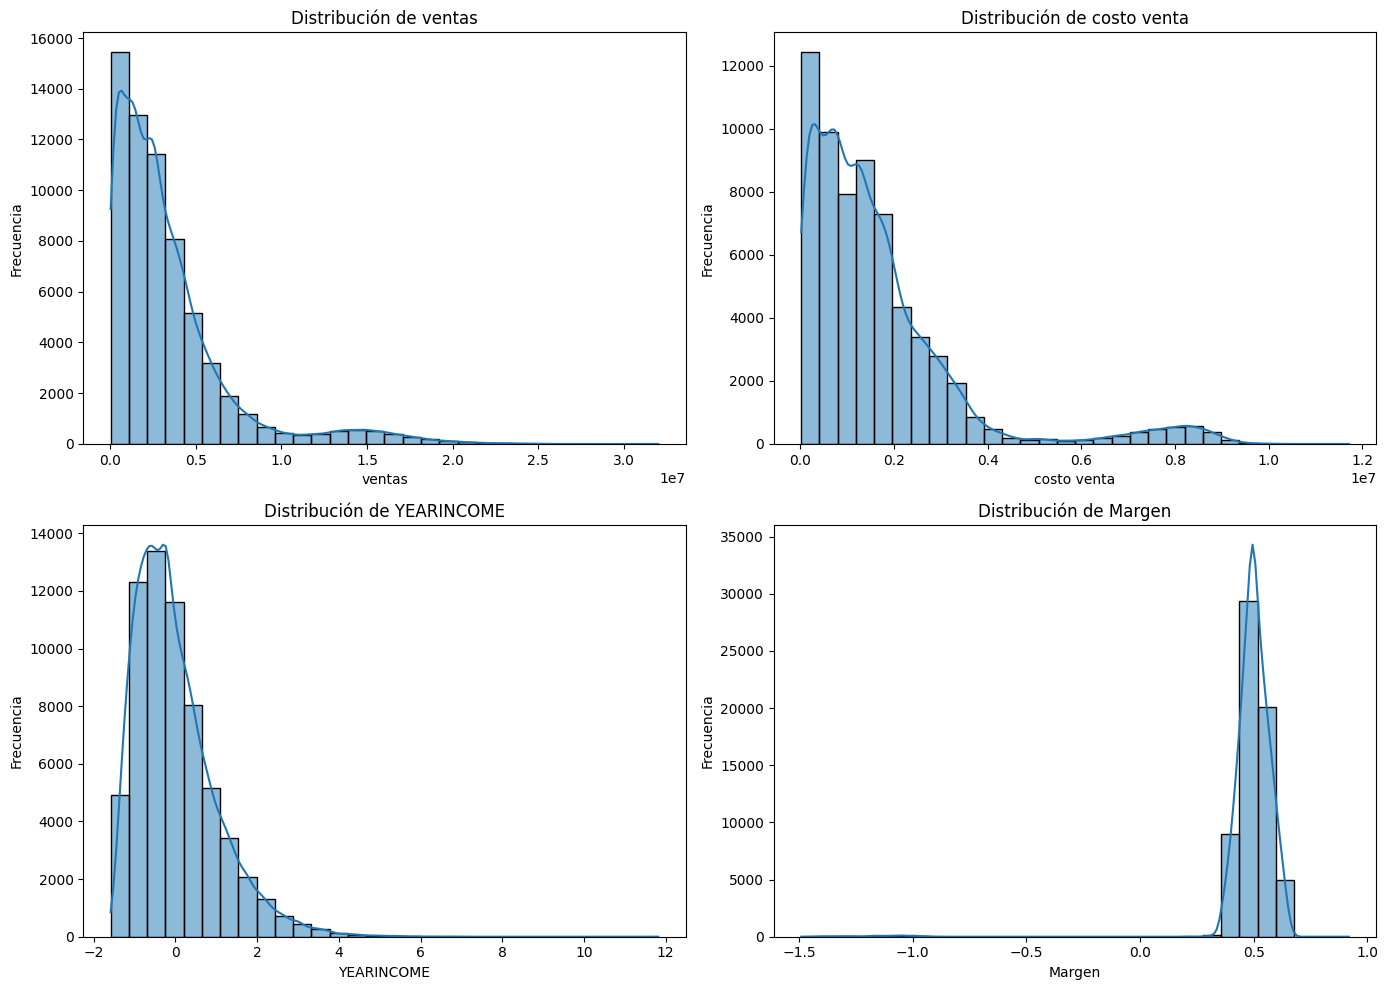

In [ ]:
numeric_columns = ['ventas', 'costo venta', 'YEARINCOME', 'Margen']
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_ventas[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Matriz de correlación

Para esto se necesita solo hacer la matriz con varialbles numericas

Matriz de Correlación:
                   id       AGE      SIZE  YEARINCOME    ventas  costo venta  \
id           1.000000 -0.004739  0.361413    0.003202  0.007035     0.007829   
AGE         -0.004739  1.000000  0.005300   -0.001590 -0.005393    -0.004650   
SIZE         0.361413  0.005300  1.000000   -0.001867 -0.000034     0.001025   
YEARINCOME   0.003202 -0.001590 -0.001867    1.000000 -0.001861    -0.001360   
ventas       0.007035 -0.005393 -0.000034   -0.001861  1.000000     0.978845   
costo venta  0.007829 -0.004650  0.001025   -0.001360  0.978845     1.000000   
DESCUENTOS   0.104188  0.000292  0.204559   -0.003308  0.009716     0.009780   
Margen      -0.001902 -0.001447 -0.004193   -0.002873  0.136514     0.004893   
Lat         -0.252896  0.007014 -0.105818   -0.001921 -0.002018    -0.001731   
Lon         -0.319009  0.004157 -0.130165    0.002035 -0.001286    -0.000778   

             DESCUENTOS    Margen       Lat       Lon  
id             0.104188 -0.001902 -0.252

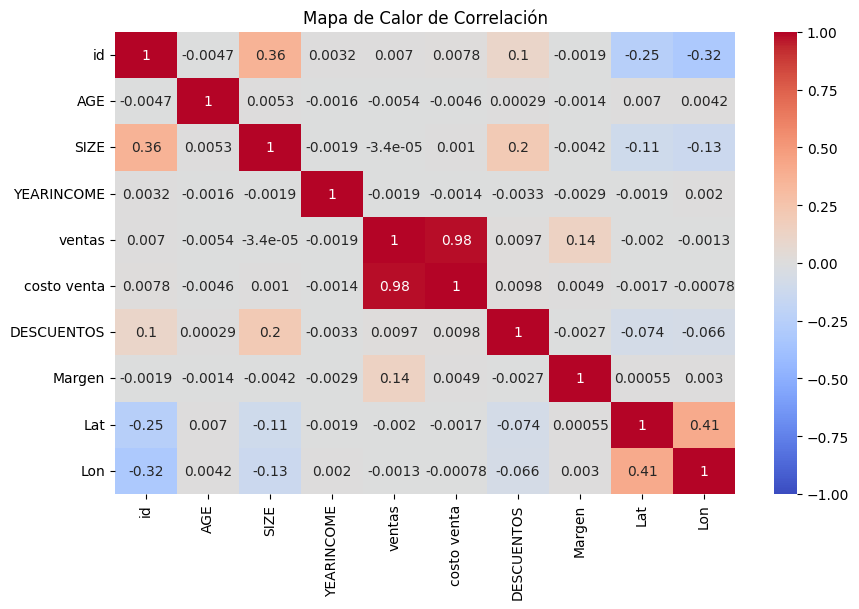

In [ ]:
numericas = df_ventas.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numericas.corr()
print("Matriz de Correlación:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlación")
plt.show()


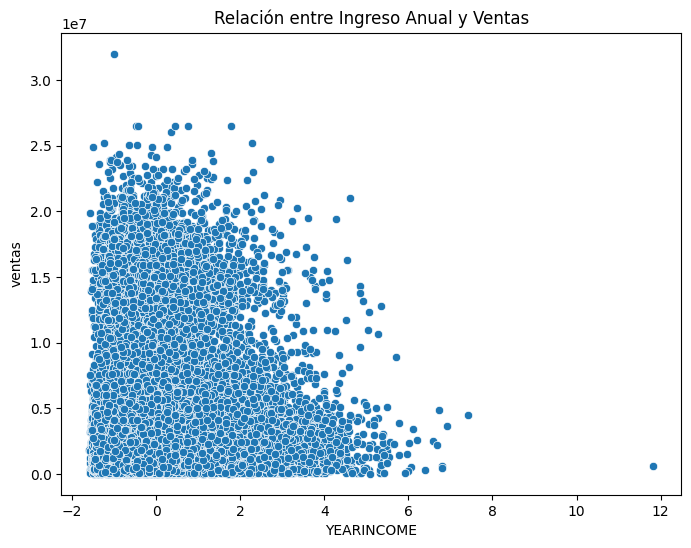

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YEARINCOME', y='ventas', data=df_ventas)
plt.title("Relación entre Ingreso Anual y Ventas")
plt.show()


Grafico viendo las ventas y el margen de ganancia segun la ciudad

In [ ]:
df_agrupado = df_ventas.groupby('AM').agg({
    'ventas': 'mean',
    'Margen': 'mean'
}).reset_index()


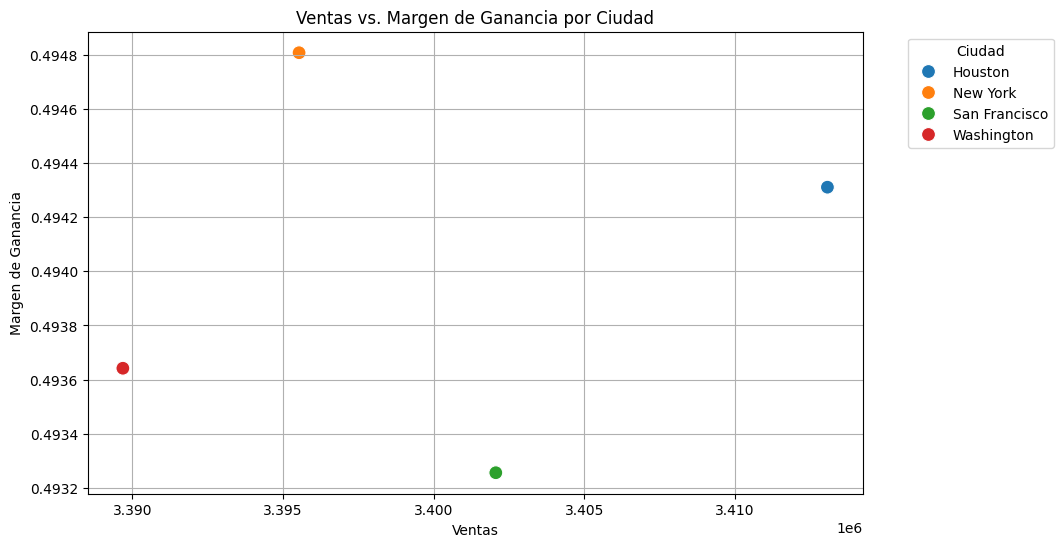

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ventas', y='Margen', hue='AM', data=df_agrupado, palette='tab10', s=100)
plt.title('Ventas vs. Margen de Ganancia por Ciudad')
plt.xlabel('Ventas')
plt.ylabel('Margen de Ganancia')
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

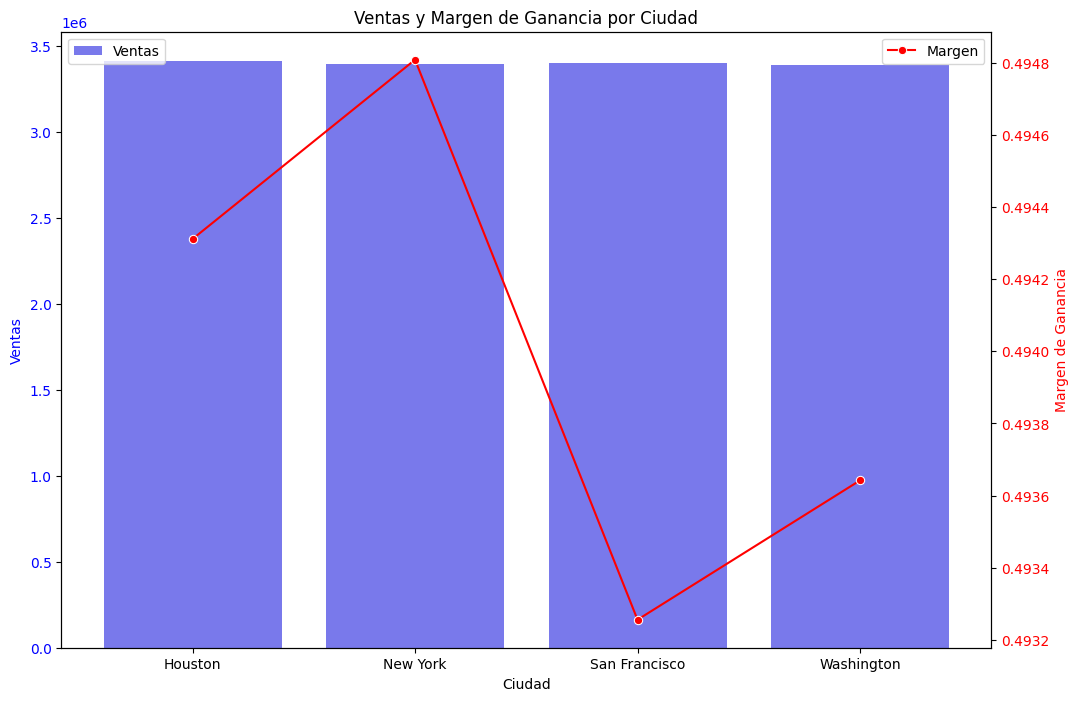

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x='AM', y='ventas', data=df_agrupado, color='b', alpha=0.6, label='Ventas', ax=ax1)
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Ventas', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(x='AM', y='Margen', data=df_agrupado, color='r', marker='o', label='Margen', ax=ax2)
ax2.set_ylabel('Margen de Ganancia', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Ventas y Margen de Ganancia por Ciudad')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Grafica de ventas por producto y ciudad

<ipython-input-32-1572569609f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='ventas', data=df_ciudad, palette='viridis')


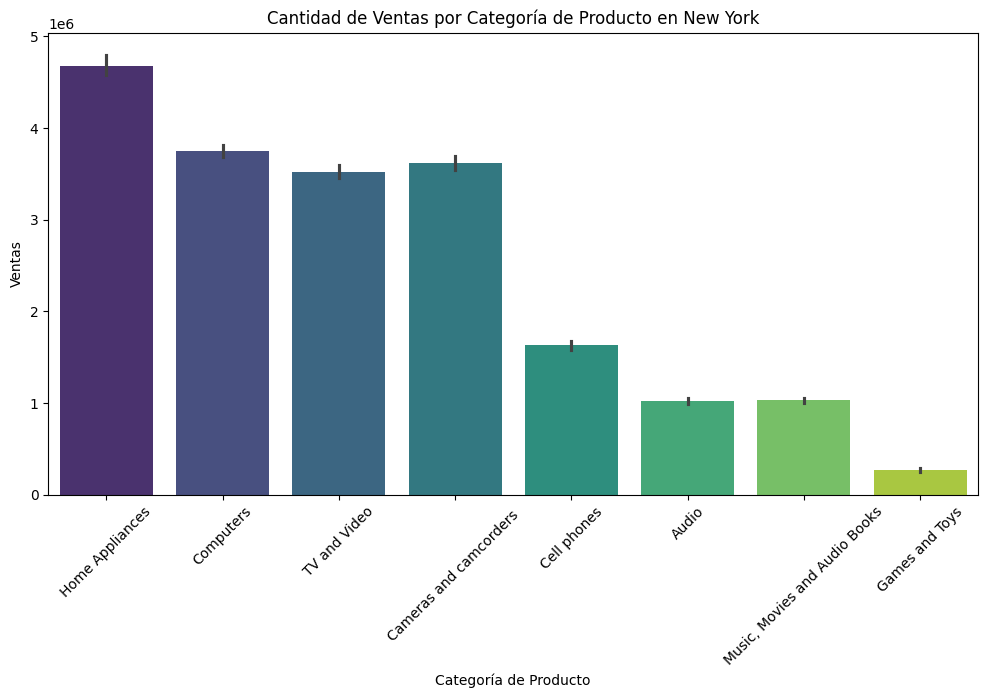

<ipython-input-32-1572569609f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='ventas', data=df_ciudad, palette='viridis')


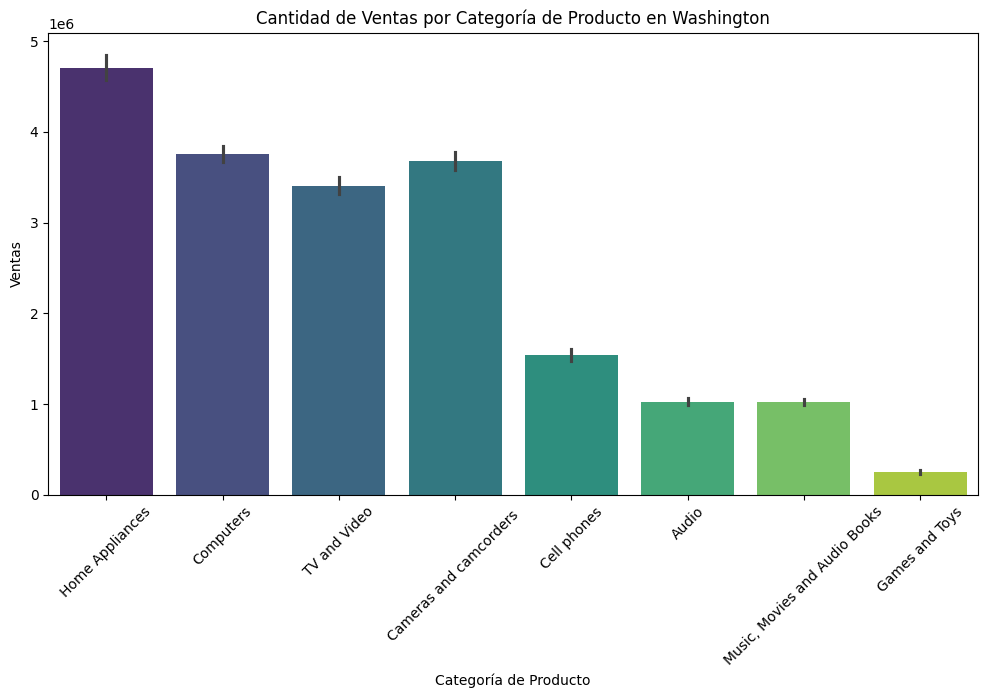

<ipython-input-32-1572569609f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='ventas', data=df_ciudad, palette='viridis')


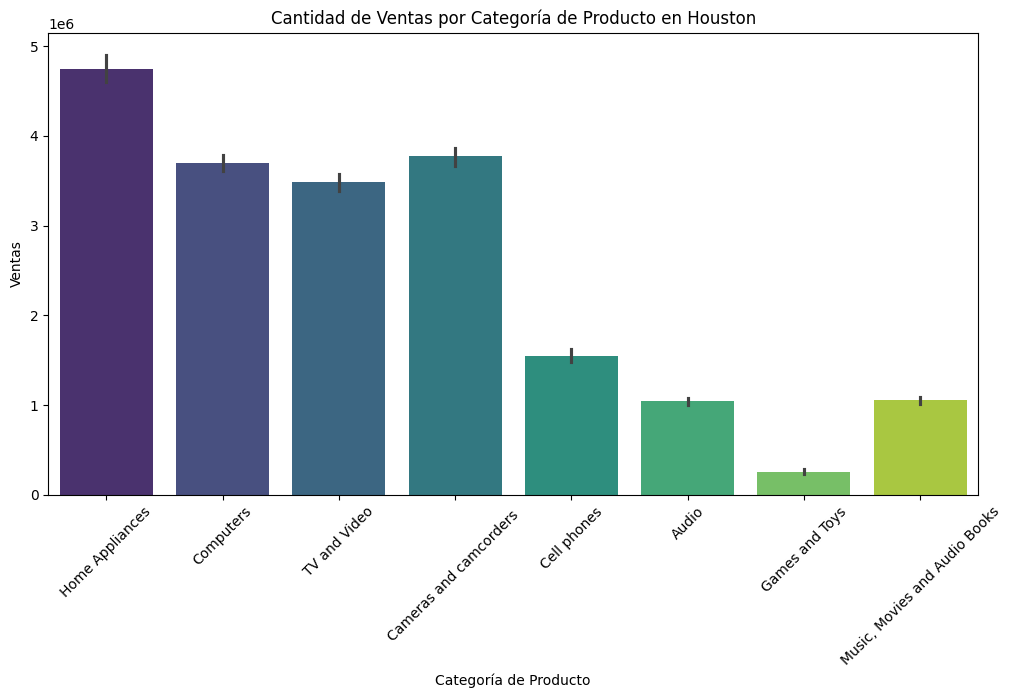

<ipython-input-32-1572569609f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='ventas', data=df_ciudad, palette='viridis')


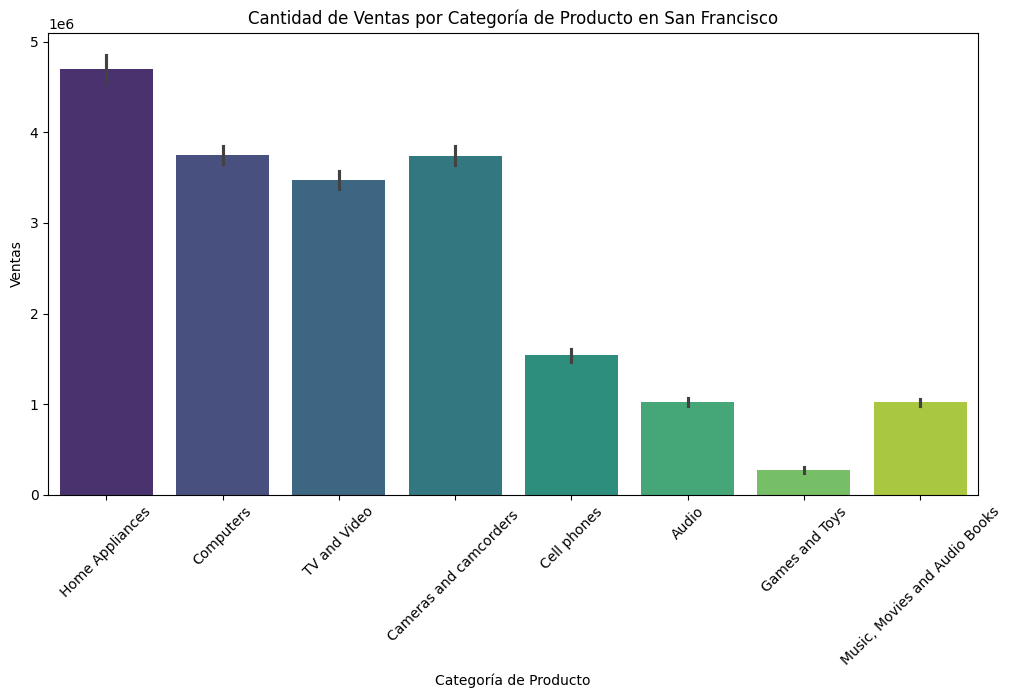

In [ ]:

for ciudad in ciudades:
    plt.figure(figsize=(12, 6))
    df_ciudad = df_ventas[df_ventas['AM'] == ciudad]

    df_ciudad = df_ciudad.sort_values(by='ventas', ascending=False)

    # Barras para ventas
    sns.barplot(x='ProductCategoryName', y='ventas', data=df_ciudad, palette='viridis')
    plt.title(f'Cantidad de Ventas por Categoría de Producto en {ciudad}')
    plt.xlabel('Categoría de Producto')
    plt.ylabel('Ventas')
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-33-148b97fdb055>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='Margen', data=df_ciudad, palette='plasma')


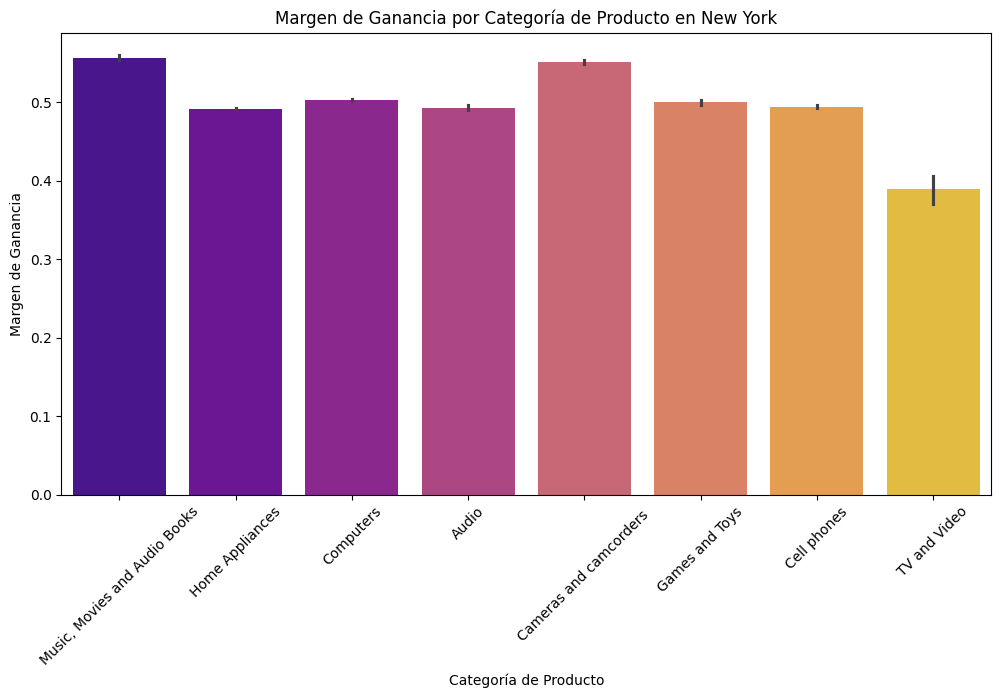

<ipython-input-33-148b97fdb055>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='Margen', data=df_ciudad, palette='plasma')


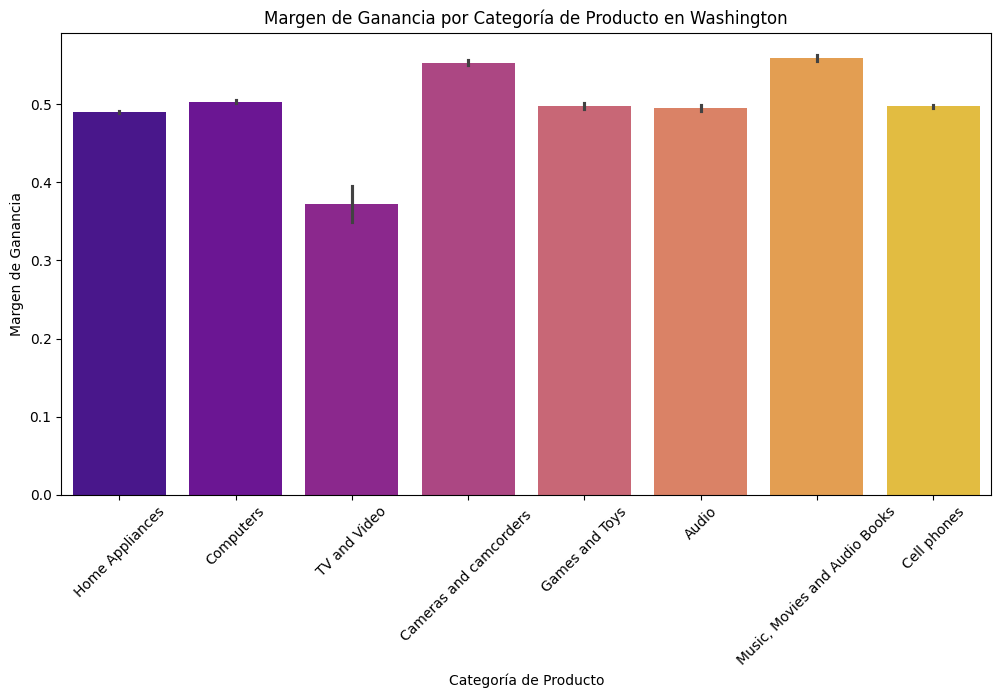

<ipython-input-33-148b97fdb055>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='Margen', data=df_ciudad, palette='plasma')


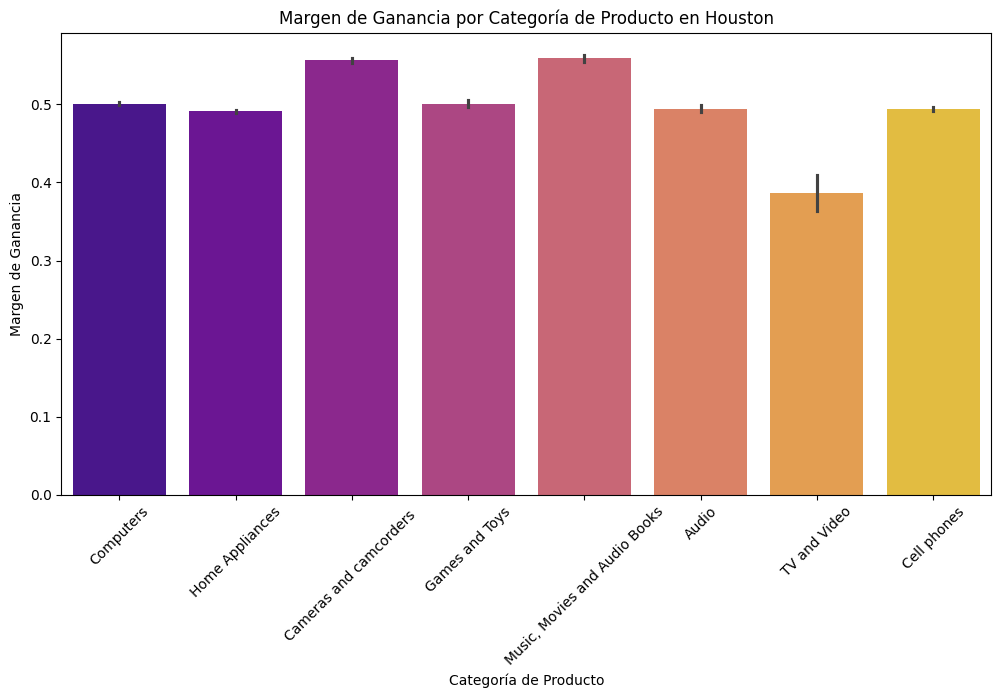

<ipython-input-33-148b97fdb055>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductCategoryName', y='Margen', data=df_ciudad, palette='plasma')


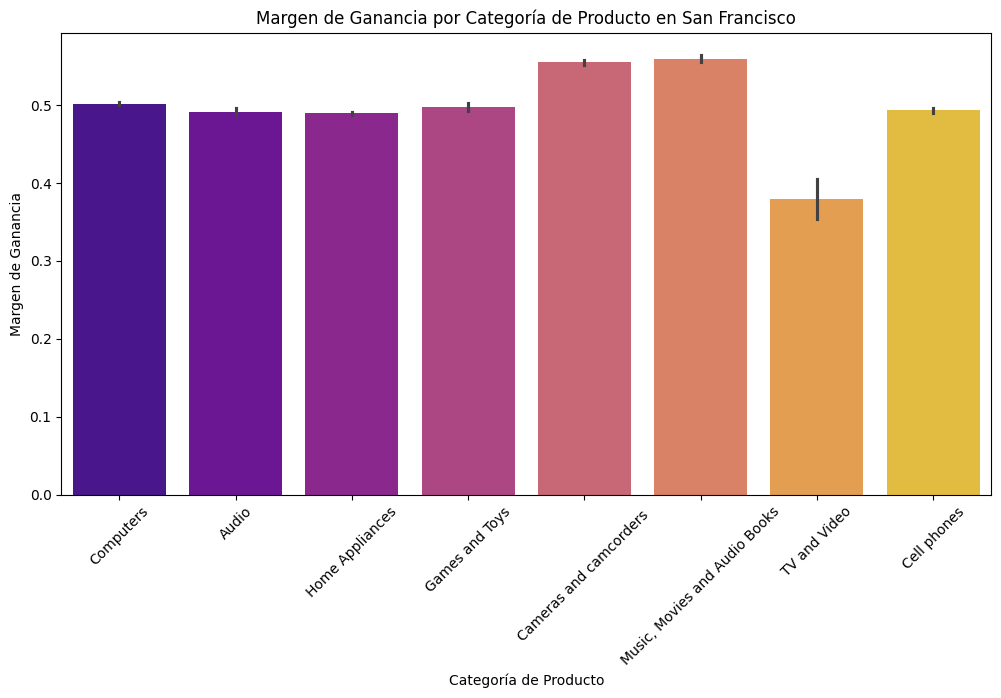

In [ ]:
for ciudad in ciudades:
    plt.figure(figsize=(12, 6))
    df_ciudad = df_ventas[df_ventas['AM'] == ciudad]

    df_ciudad = df_ciudad.sort_values(by='Margen', ascending=False)

    sns.barplot(x='ProductCategoryName', y='Margen', data=df_ciudad, palette='plasma')
    plt.title(f'Margen de Ganancia por Categoría de Producto en {ciudad}')
    plt.xlabel('Categoría de Producto')
    plt.ylabel('Margen de Ganancia')
    plt.xticks(rotation=45)
    plt.show()



<ipython-input-35-6849e7085623>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ProductCategoryName', y='ventas', hue='AM', data=df_ventas, palette='viridis', ci=None)


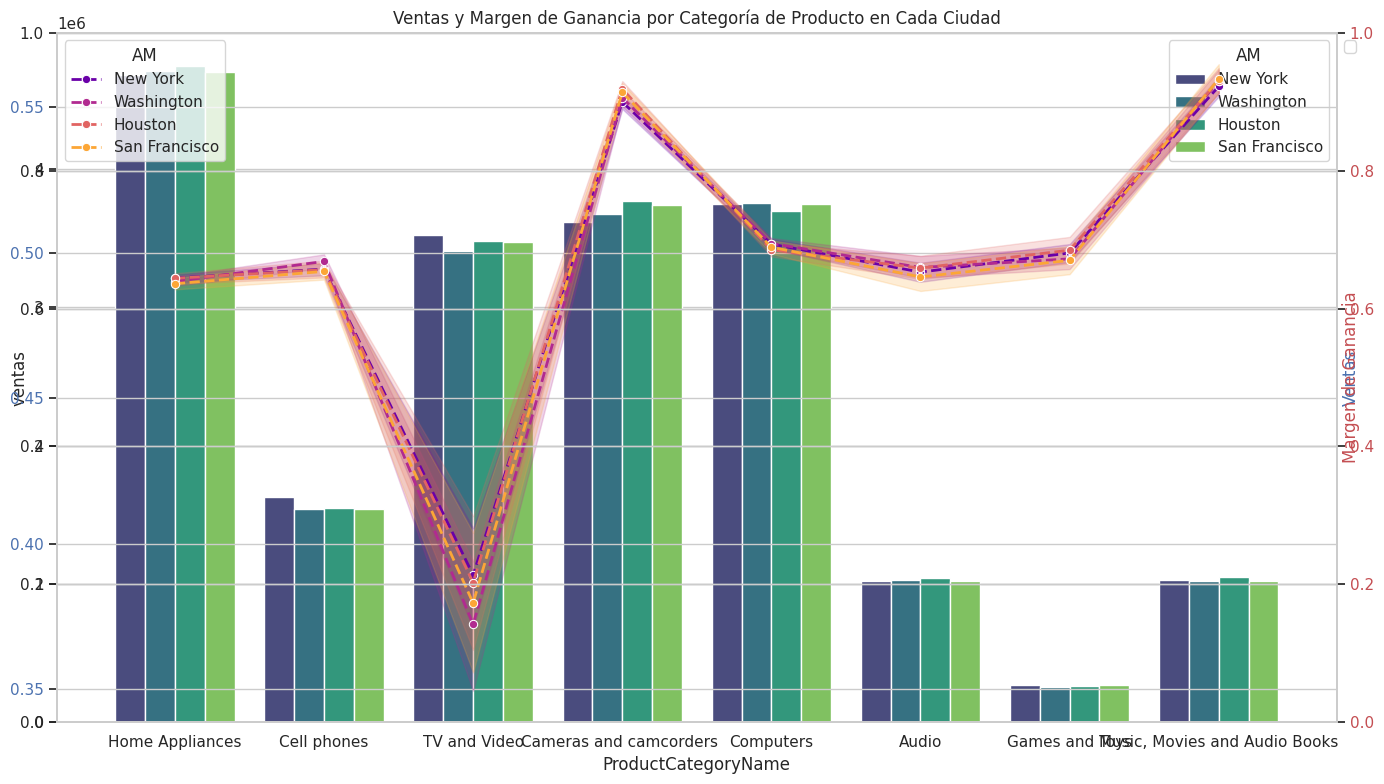

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.barplot(x='ProductCategoryName', y='ventas', hue='AM', data=df_ventas, palette='viridis', ci=None)

plt.twinx()
sns.lineplot(x='ProductCategoryName', y='Margen', hue='AM', data=df_ventas, palette='plasma', marker='o', linestyle='--', linewidth=2)

plt.title('Ventas y Margen de Ganancia por Categoría de Producto en Cada Ciudad')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ventas', color='b')
plt.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45)

plt.gca().twinx().set_ylabel('Margen de Ganancia', color='r')
plt.gca().twinx().tick_params(axis='y', labelcolor='r')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


In [ ]:
df_agrupado_descuentos = df_ventas.groupby(['AM', 'ProductCategoryName']).agg({
    'DESCUENTOS': 'mean'
}).reset_index()


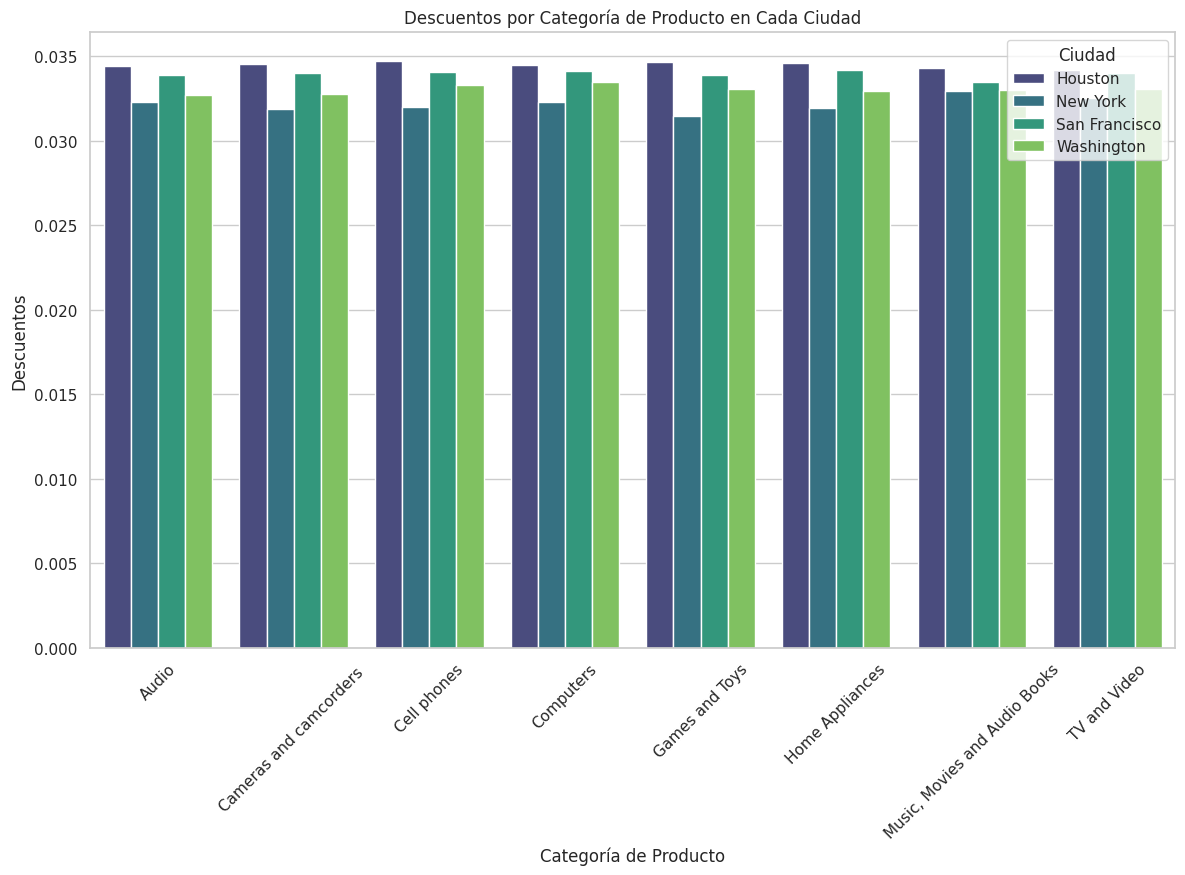

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='ProductCategoryName', y='DESCUENTOS', hue='AM', data=df_agrupado_descuentos, palette='viridis')
plt.title('Descuentos por Categoría de Producto en Cada Ciudad')
plt.xlabel('Categoría de Producto')
plt.ylabel('Descuentos')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')

plt.show()


Ingreso anual por ciudad

In [ ]:
df_ingreso_anual = df_ventas.groupby('AM').agg({
    'YEARINCOME': 'mean'
}).reset_index()


<ipython-input-39-3e17f3a259b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AM', y='YEARINCOME', data=df_ingreso_anual, palette='viridis')


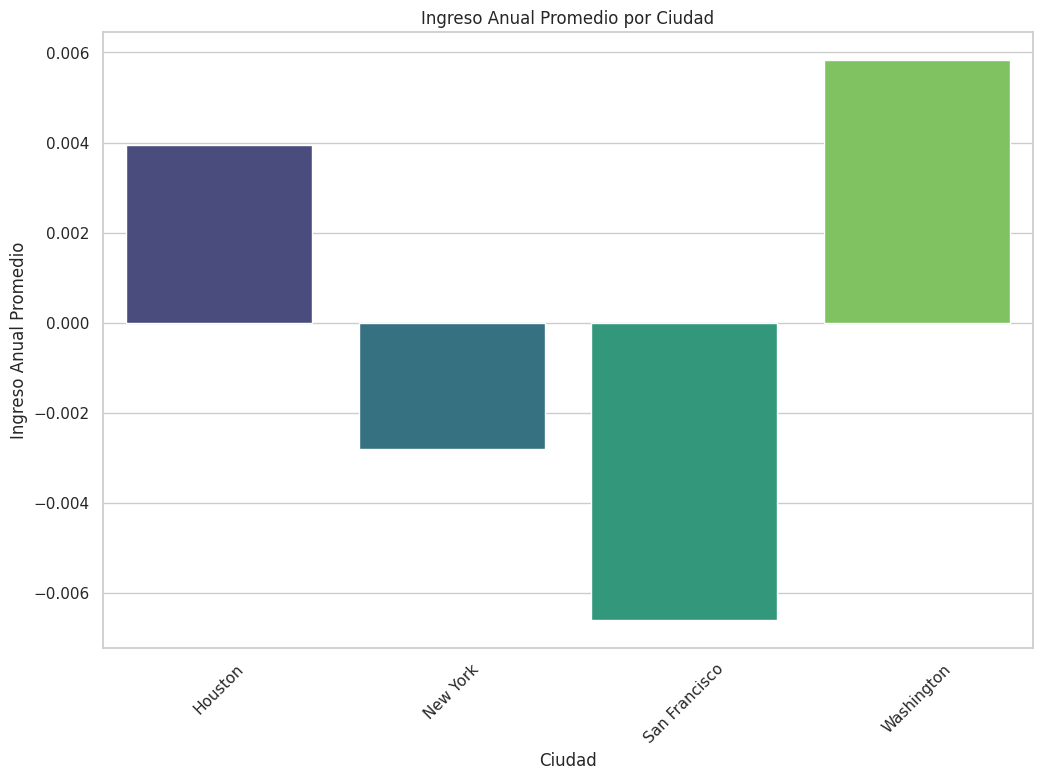

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='AM', y='YEARINCOME', data=df_ingreso_anual, palette='viridis')

plt.title('Ingreso Anual Promedio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ingreso Anual Promedio')
plt.xticks(rotation=45)
plt.show()


Gráfica de estado civil compra de producto por ciudad

In [ ]:
df_ventas_categoria_estado = df_ventas.groupby(['AM', 'MARITUS ST', 'ProductCategoryName'])['ventas'].sum().reset_index()


<Figure size 1600x1000 with 0 Axes>

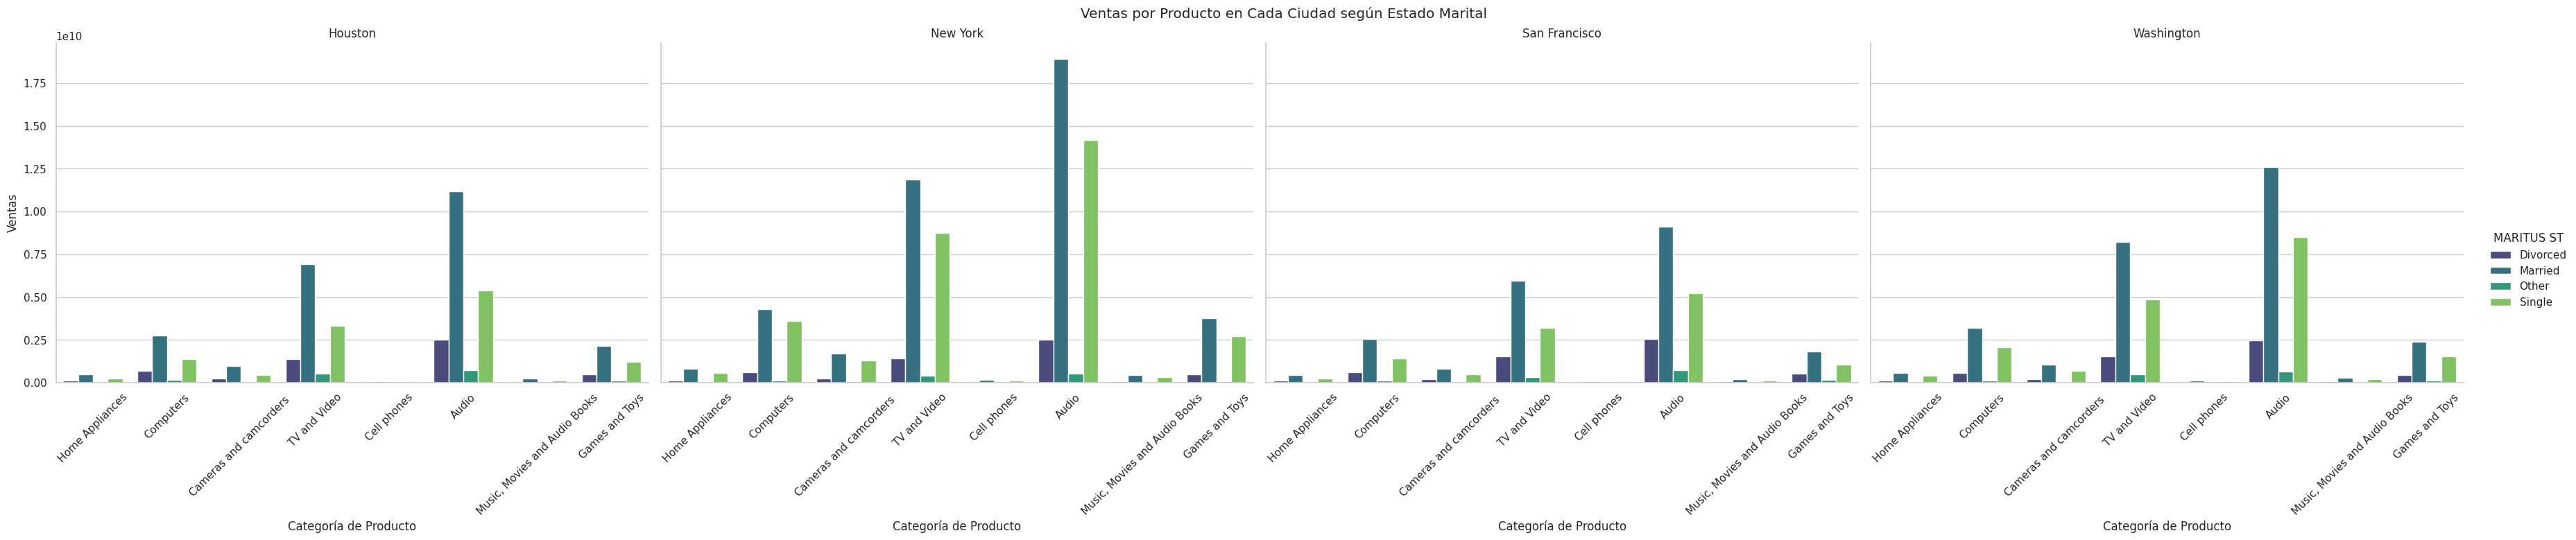

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

g = sns.catplot(
    data=df_ventas_categoria_estado,
    x='ProductCategoryName',
    y='ventas',
    hue='MARITUS ST',
    col='AM',
    kind='bar',
    height=6,
    aspect=1.5,
    palette='viridis'
)

g.fig.suptitle('Ventas por Producto en Cada Ciudad según Estado Marital', y=1.02)
g.set_axis_labels('Categoría de Producto', 'Ventas')
g.set_titles(col_template="{col_name}")


product_order = df_ventas_categoria_estado.groupby('ProductCategoryName')['ventas'].sum().sort_values(ascending=False).index
g.set_xticklabels(rotation=45, labels=product_order)

plt.show()


Rango de edad por ciudad

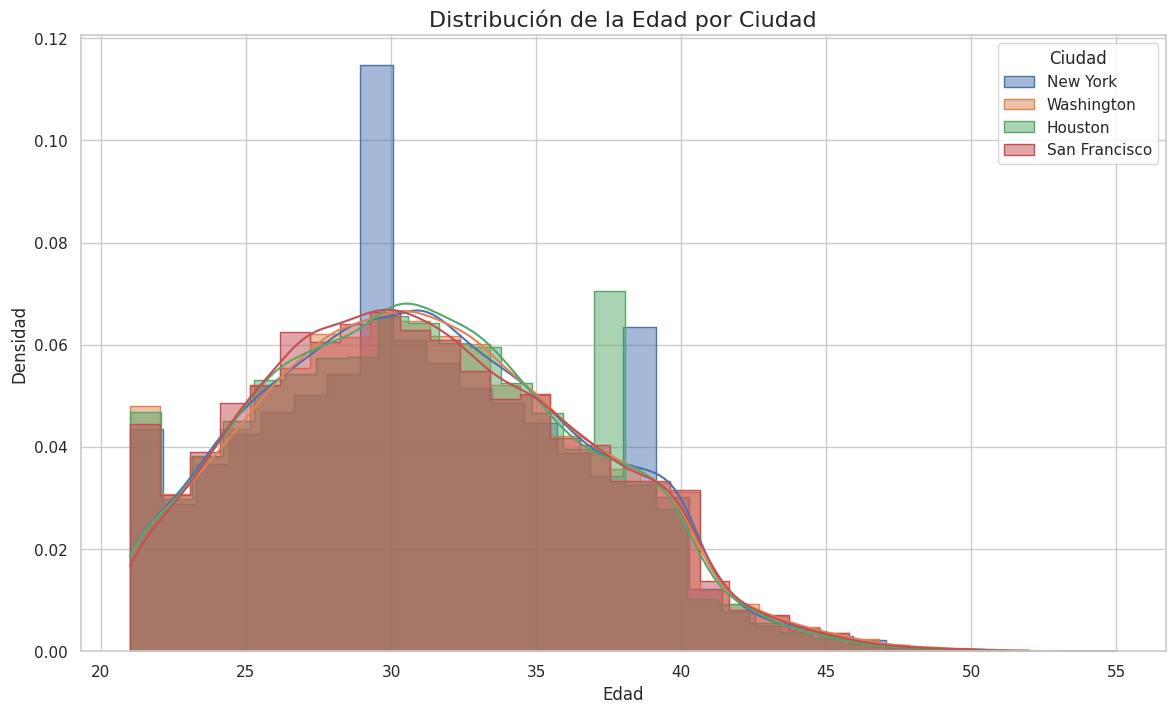

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

for ciudad in df_ventas['AM'].unique():
    subset = df_ventas[df_ventas['AM'] == ciudad]
    sns.histplot(data=subset, x='AGE', kde=True, label=ciudad, bins=30, element='step', stat='density')

plt.title('Distribución de la Edad por Ciudad', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(title='Ciudad')
plt.show()